## 1. Standard Import

In [1]:
# For Data Visualization
import matplotlib.pyplot as plt
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

# to read an image from a url
from imageio import imread

# for number-crunching
import numpy as np

## 2. Import VGG Trained model

In [3]:
# import the model
# Following is depricated
# vggnet = torchvision.models.vgg19(progress=True, pretrained=True)

# We can use the following instead. 
weights = torchvision.models.VGG19_Weights.DEFAULT
vggnet =  torchvision.models.vgg19(weights=weights, progress = True)

In [4]:
vggnet

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [5]:
vggnet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:
vggnet.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [7]:
# freeze all layers
for p in vggnet.parameters():
    print(p)
    p.requires_grad = False
    print("******************\n")

Parameter containing:
tensor([[[[-5.3474e-02, -4.9257e-02, -6.7942e-02],
          [ 1.5314e-02,  4.5068e-02,  2.1444e-03],
          [ 3.6226e-02,  1.9999e-02,  1.9864e-02]],

         [[ 1.7015e-02,  5.5403e-02, -6.2293e-03],
          [ 1.4165e-01,  2.2705e-01,  1.3758e-01],
          [ 1.2000e-01,  2.0030e-01,  9.2114e-02]],

         [[-4.4885e-02,  1.2680e-02, -1.4497e-02],
          [ 5.9742e-02,  1.3955e-01,  5.4102e-02],
          [-9.6141e-04,  5.8304e-02, -2.9663e-02]]],


        [[[ 2.6072e-01, -3.0489e-01, -5.0152e-01],
          [ 4.1376e-01, -2.0831e-01, -4.9086e-01],
          [ 5.8770e-01,  4.2851e-01, -1.3850e-01]],

         [[ 2.8746e-01, -3.3338e-01, -4.5564e-01],
          [ 3.7836e-01, -2.9144e-01, -4.9720e-01],
          [ 5.4778e-01,  4.8983e-01, -1.7166e-01]],

         [[ 6.7260e-02, -9.5386e-02, -3.8037e-02],
          [ 6.1955e-02, -1.3125e-01, -1.0691e-01],
          [ 4.8107e-02,  2.2999e-01, -3.0578e-02]]],


        [[[-3.2457e-02,  1.6281e-01,  5.9687

Parameter containing:
tensor([[ 1.8839e-03,  1.0833e-03,  2.2293e-03,  ...,  7.0419e-04,
         -5.7001e-03, -2.0335e-03],
        [ 6.7737e-03,  1.3157e-02,  5.6106e-03,  ...,  2.1448e-03,
          3.3124e-03, -2.2311e-03],
        [ 5.3605e-03,  1.0641e-03,  7.8152e-03,  ..., -6.5152e-03,
         -6.6172e-03, -9.9564e-03],
        ...,
        [-2.6054e-03,  2.3320e-04,  4.7448e-05,  ...,  1.4459e-03,
          3.2104e-03,  6.2496e-03],
        [ 3.9412e-03,  5.4061e-04, -7.7027e-04,  ..., -3.5460e-04,
          7.3532e-04, -8.8309e-04],
        [-6.1274e-03,  2.0449e-03,  2.3138e-03,  ...,  3.9595e-03,
          9.3567e-03,  2.7806e-03]], requires_grad=True)
******************

Parameter containing:
tensor([ 0.0118,  0.0273, -0.0036,  ..., -0.0049,  0.0172,  0.0030],
       requires_grad=True)
******************

Parameter containing:
tensor([[-7.8876e-03,  1.7527e-02,  2.3645e-03,  ..., -1.1348e-02,
          8.7357e-03, -4.4053e-03],
        [ 7.6360e-04, -5.4339e-03, -3.6614e

In [8]:
# set to evaluation mode
vggnet.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

## 3. Import the Content and Style images

In [9]:
import imageio.v2 as imageio

### (i) Download the images

In [10]:
content_img = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
style_img  = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg')

# initialize the target image with random numbers
target_img = np.random.randint(low=0,high=255,size=content_img.shape,dtype=np.uint8)

In [11]:
content_img

Array([[[ 50,  62,  50],
        [ 78,  91,  73],
        [ 74,  87,  70],
        ...,
        [  4,  96, 179],
        [  7, 104, 185],
        [  0,  98, 176]],

       [[ 70,  83,  65],
        [ 59,  72,  55],
        [ 67,  79,  65],
        ...,
        [  2,  97, 179],
        [  3, 100, 181],
        [  4,  99, 181]],

       [[ 70,  83,  63],
        [ 86, 100,  75],
        [ 83,  97,  74],
        ...,
        [  0,  99, 180],
        [  1,  98, 179],
        [  7,  99, 182]],

       ...,

       [[ 71,  66,  62],
        [ 68,  67,  63],
        [ 71,  68,  63],
        ...,
        [ 47,  48,  42],
        [ 49,  50,  44],
        [ 44,  43,  38]],

       [[ 71,  66,  63],
        [ 63,  62,  57],
        [ 70,  67,  62],
        ...,
        [ 45,  46,  40],
        [ 45,  46,  40],
        [ 46,  45,  40]],

       [[ 68,  63,  60],
        [ 67,  66,  61],
        [ 74,  71,  66],
        ...,
        [ 45,  46,  40],
        [ 44,  45,  39],
        [ 47,  46,  41]]

In [12]:
# Format : height x width x channels
print("Content image : ",content_img.shape)
print("Style image : ",style_img.shape)

print("Target image : ",target_img.shape)


# These images are really large, which will make the training slow
# therefore need to apply the transformations.

Content image :  (1675, 3000, 3)
Style image :  (4000, 3223, 3)
Target image :  (1675, 3000, 3)


### (ii) Resizing and Transformations

**PIL format** - Stands for Python Imaging Library, is a powerful library that provides extensive support for opening, manipulating, and saving many different image file formats

#### (a) T.ToTensor() : Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
Converts a PIL Image or numpy.ndarray (H x W x C) in the range
[0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
or if the numpy.ndarray has dtype = np.uint8

**(b) T.Resize() : Resize the input image to the given size.**

            If the image is torch Tensor, it is expected to have [..., H, W] shape,
            where ... means an arbitrary number of leading dimensions

Parameters : 

(i) size (sequence or int): Desired output size. 
        
    (a) If size is a sequence like (h, w), output size will be matched to this. 
    (b) If size is an int, smaller edge of the image will be matched to this number.
        i.e, if height > width, then image will be rescaled to :
            
        new_height = size * height / width
        new_width = size
        
        rescaled_dimensions = (new_height, new_width).

**(c) T.Normalize(mean, std, inplace=False)**
   
Normalize a tensor image with mean and standard deviation.
This transform does not support PIL Image.

In [13]:
# create the transforms

Ts = T.Compose([ T.ToTensor(),
                 T.Resize(256),
                 T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
               ])

# Apply them to the images ("unsqueeze" to make them a 4D tensor) 
content_img = Ts( content_img ).unsqueeze(0)
style_img   = Ts( style_img   ).unsqueeze(0)
target_img  = Ts( target_img  ).unsqueeze(0)

#### Before Transformations

    Content image :  (1675, 3000, 3)
    Style image :  (4000, 3223, 3)
    Target image :  (1675, 3000, 3)

In [14]:
# Format : 1 x channels x height x width
print("Content image : ",content_img.shape)
print("Style image : ",style_img.shape)

print("Target image : ",target_img.shape)

Content image :  torch.Size([1, 3, 256, 458])
Style image :  torch.Size([1, 3, 317, 256])
Target image :  torch.Size([1, 3, 256, 458])


### (iii) Images Visualization

In [15]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [16]:
content_img.shape

torch.Size([1, 3, 256, 458])

In [17]:
# Squeezes the Singleton dimension
content_img.squeeze().shape

torch.Size([3, 256, 458])

In [18]:
content_img.squeeze().numpy().shape

(3, 256, 458)

In [19]:
content_img.squeeze().numpy().transpose( (1,2,0) ).shape

(256, 458, 3)

In [20]:
np.max(content_img.squeeze().numpy().transpose( (1,2,0) ))

2.64

In [21]:
np.min(content_img.squeeze().numpy().transpose( (1,2,0) ))

-2.117904

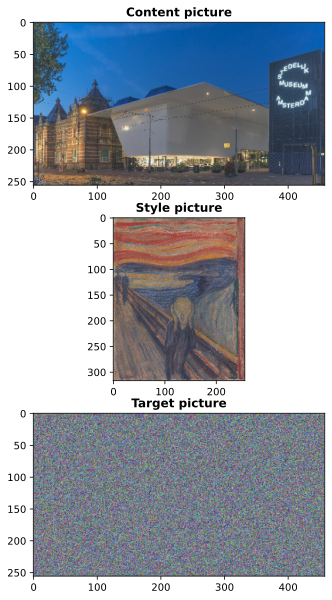

In [22]:
# Let's have a look at the "before" pics
fig,ax = plt.subplots(3,1, figsize=(8,10), dpi=135)

############ Content Image ###################
pic = content_img.squeeze().numpy().transpose( (1,2,0) )

# input image data to the valid range for imshow with RGB data ([0..1] for floats or 
# [0..255] for integers)
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

ax[0].imshow(pic)
ax[0].set_title('Content picture' , fontweight='bold')

############# Style Image #################
pic = style_img.squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[1].imshow(pic)
ax[1].set_title('Style picture', fontweight="bold")


################## Target Image ################
pic = target_img.squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[2].imshow(pic)
ax[2].set_title('Target picture', fontweight='bold')

plt.show()

### 4. Custom functions for Feature Map extraction and Gram matrix calculation

In [23]:
vggnet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [24]:
type(vggnet.features)

torch.nn.modules.container.Sequential

In [25]:
len(vggnet.features)

37

In [26]:
vggnet.features[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

#### (i) Function that returns Feature maps

In [27]:
def getFeatureMapActs(img, net):
  
    # initialize feature maps or channels as a list
    featuremaps = []
    Conv_layers = []

    convLayerIdx = 0

    # loop through all layers in the "features" block
    for layernum in range(len(net.features)):

        # print out info from this layer
        # print(layernum,net.features[layernum])
        
        # process the image through this layer
        img = net.features[layernum](img)

        # Process and store the image if it's a conv2d layer
        if 'Conv2d' in str(net.features[layernum]):
                
            # Store the Feature map
            featuremaps.append( img )
            Conv_layers.append( 'ConvLayer_' + str(convLayerIdx) )
            convLayerIdx += 1
  
    return featuremaps,Conv_layers

#### (ii) Function that returns the Gram matrix of the feature activation map

In [28]:
def gram_matrix(M):
  
    # reshape to 2D
    _,chans,height,width = M.shape
    M = M.reshape(chans,height*width)  

    # compute and return covariance matrix
    gram = torch.mm(M,M.t()) / (chans*height*width)
    return gram

In [29]:
# inspect the output of the function
featmaps,conv_layers = getFeatureMapActs(content_img,vggnet)

# print out some info
for i in range(len(conv_layers)):
    print(f'Feature map from {conv_layers[i]} is size {featmaps[i].shape}')

Feature map from ConvLayer_0 is size torch.Size([1, 64, 256, 458])
Feature map from ConvLayer_1 is size torch.Size([1, 64, 256, 458])
Feature map from ConvLayer_2 is size torch.Size([1, 128, 128, 229])
Feature map from ConvLayer_3 is size torch.Size([1, 128, 128, 229])
Feature map from ConvLayer_4 is size torch.Size([1, 256, 64, 114])
Feature map from ConvLayer_5 is size torch.Size([1, 256, 64, 114])
Feature map from ConvLayer_6 is size torch.Size([1, 256, 64, 114])
Feature map from ConvLayer_7 is size torch.Size([1, 256, 64, 114])
Feature map from ConvLayer_8 is size torch.Size([1, 512, 32, 57])
Feature map from ConvLayer_9 is size torch.Size([1, 512, 32, 57])
Feature map from ConvLayer_10 is size torch.Size([1, 512, 32, 57])
Feature map from ConvLayer_11 is size torch.Size([1, 512, 32, 57])
Feature map from ConvLayer_12 is size torch.Size([1, 512, 16, 28])
Feature map from ConvLayer_13 is size torch.Size([1, 512, 16, 28])
Feature map from ConvLayer_14 is size torch.Size([1, 512, 16, 

In [30]:
arr = np.random.randint(low=1, high=4 ,size =(3,2,3))
arr

array([[[3, 2, 2],
        [2, 2, 2]],

       [[3, 3, 1],
        [1, 1, 3]],

       [[3, 2, 1],
        [3, 1, 2]]])

In [31]:
np.mean(arr , axis=0)

array([[3.        , 2.33333333, 1.33333333],
       [2.        , 1.33333333, 2.33333333]])

#### (iii) Testing for content image

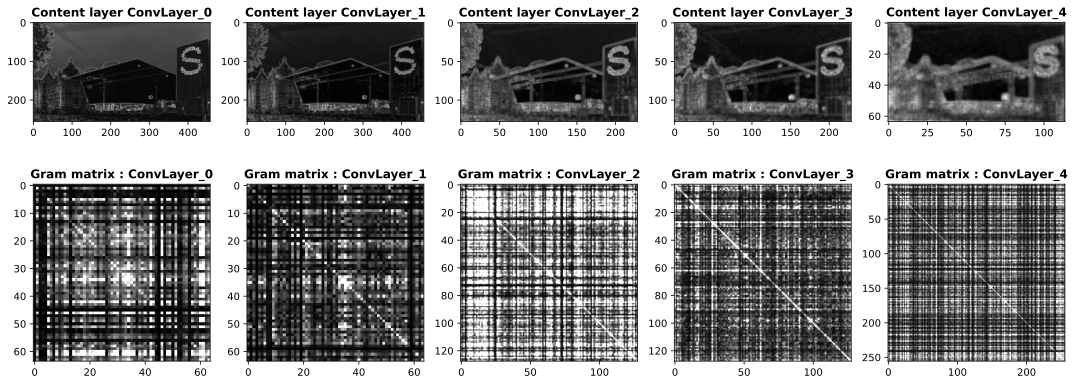

In [32]:
# let's see what the "content" image looks like
contentFeatureMaps,contentconv_layers = getFeatureMapActs(content_img, vggnet)

fig,axs = plt.subplots(2,5,figsize=(15,6) ,dpi=135)

# Selecting only first 5 conv layers output
for i in range(5):

    # average over all feature maps from this layer, and normalize
    pic = np.mean( contentFeatureMaps[i].squeeze().numpy() ,axis=0)
    pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

    axs[0,i].imshow(pic,cmap='gray')
    axs[0,i].set_title('Content layer ' + str(contentconv_layers[i]), fontweight = 'bold')


    ### now show the gram matrix
    grammatrix = gram_matrix(contentFeatureMaps[i])
    
    pic = grammatrix.numpy()
    pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

    axs[1,i].imshow(pic,cmap='gray',vmax=.1)
    axs[1,i].set_title('Gram matrix : ' + str(contentconv_layers[i]), fontweight='bold')

plt.tight_layout()
plt.show()

# As we go deeper into the conv layers , more abstract representation of image occurs.

#### (iv) Testing for Style image

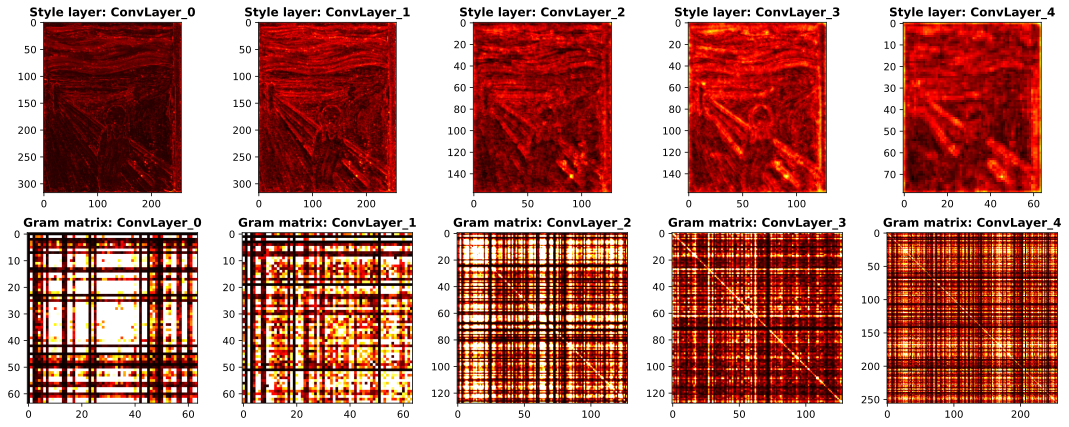

In [33]:
# repeat for the "style" image
styleFeatureMaps,styleconv_layers = getFeatureMapActs(style_img,vggnet)

fig,axs = plt.subplots(2,5,figsize=(15,6), dpi=135)
for i in range(5):

    # average over all feature maps from this layer, and normalize
    pic = np.mean( styleFeatureMaps[i].squeeze().numpy() ,axis=0)
    pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

    axs[0,i].imshow(pic,cmap='hot')
    axs[0,i].set_title('Style layer: ' + str(styleconv_layers[i]), fontweight='bold')


    ### now show the gram matrix
    pic = gram_matrix(styleFeatureMaps[i]).cpu().numpy()
    pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))

    axs[1,i].imshow(pic,cmap='hot',vmax=.1)
    axs[1,i].set_title('Gram matrix: ' + str(styleconv_layers[i]), fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Style Transfer Code

In [34]:
# which layers to use

# Combination-1 
# layers4content = [ 'ConvLayer_0', 'ConvLayer_1', 'ConvLayer_2', 'ConvLayer_3' ]
# layers4style   = [ 'ConvLayer_0', 'ConvLayer_1', 'ConvLayer_2', 'ConvLayer_3' ]
# weights4style  = [      0.8       ,     1      ,     .5      ,     1            ]


# Combination-2
layers4content = [ 'ConvLayer_1','ConvLayer_4' ]
layers4style   = [ 'ConvLayer_1','ConvLayer_2','ConvLayer_3','ConvLayer_4','ConvLayer_5' ]
weights4style  = [      1       ,     .5      ,     .5      ,     .2      ,     .1       ]

In [35]:
layers4style.index('ConvLayer_2')

1

### Testing the Algorithm

#### target.requires_grad = True
- because in Style Transfer algo, we train only the Target image

In [36]:
# make a copy of the target image and push to GPU
target = target_img.clone()
target.requires_grad = True

# Gram matrix scaling
styleScaling = 1e6

# number of epochs to train
numepochs = 2

# optimizer for backprop
# params (iterable): iterable of parameters to optimize
# In Style Transfer algo, we are training only the Target image
optimizer = torch.optim.RMSprop(params=[target],lr=.005)


for epochi in range(numepochs):
    
    print(f'Epoch : {epochi}')
    # extract the target feature maps
    targetFeatureMaps,targetconv_layers = getFeatureMapActs(target,vggnet)


    # initialize the individual loss components
    styleLoss = 0
    contentLoss = 0

    # loop over layers
    for layeri in range(len(targetconv_layers)):


        # compute the content loss
        if targetconv_layers[layeri] in layers4content:
            contentLoss += torch.mean( (targetFeatureMaps[layeri]-contentFeatureMaps[layeri])**2 )
            print(f'contentLoss for TargetConv_layer : {targetconv_layers[layeri]} = ',contentLoss)

        # compute the style loss
        if targetconv_layers[layeri] in layers4style:

            # Gram matrices
            Gtarget = gram_matrix(targetFeatureMaps[layeri])
            Gstyle  = gram_matrix(styleFeatureMaps[layeri])

            # compute their loss (de-weighted with increasing depth)
            styleLoss += torch.mean( (Gtarget-Gstyle)**2 ) * weights4style[layers4style.index(targetconv_layers[layeri])]
            print(f'styleLoss for TargetConv_layer : {targetconv_layers[layeri]} = ',styleLoss)
  
    # combined loss
    combiloss = styleScaling*styleLoss + contentLoss
    print(f'combiloss for Epoch {epochi} : ',combiloss)

    # finally ready for backprop!
    optimizer.zero_grad()
    combiloss.backward()
    optimizer.step()
    print('*********\n\n\n')

Epoch : 0
contentLoss for TargetConv_layer : ConvLayer_1 =  tensor(5.1841, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_1 =  tensor(0.0005, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_2 =  tensor(0.0009, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_3 =  tensor(0.0015, grad_fn=<AddBackward0>)
contentLoss for TargetConv_layer : ConvLayer_4 =  tensor(30.5120, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_4 =  tensor(0.0020, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_5 =  tensor(0.0022, grad_fn=<AddBackward0>)
combiloss for Epoch 0 :  tensor(2196.4558, grad_fn=<AddBackward0>)
*********



Epoch : 1
contentLoss for TargetConv_layer : ConvLayer_1 =  tensor(4.9339, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_1 =  tensor(0.0004, grad_fn=<AddBackward0>)
styleLoss for TargetConv_layer : ConvLayer_2 =  tensor(0.0007, grad_fn=<AddBackward0>)
styleLoss for TargetCon

In [37]:
# timetaken=20mins for 500 iterations
# make a copy of the target image 
target = target_img.clone()
target.requires_grad = True

# Gram matrix scaling
styleScaling = 1e6

# number of epochs to train
numepochs = 500

# optimizer for backprop
# params (iterable): iterable of parameters to optimize
# In Style Transfer algo, we are training only the Target image
optimizer = torch.optim.RMSprop(params=[target],lr=.005)


for epochi in range(numepochs):
    
    #print(f'Epoch : {epochi}')
    # extract the target feature maps
    targetFeatureMaps,targetconv_layers = getFeatureMapActs(target,vggnet)


    # initialize the individual loss components
    styleLoss = 0
    contentLoss = 0

    # loop over layers
    for layeri in range(len(targetconv_layers)):


        # compute the content loss
        if targetconv_layers[layeri] in layers4content:
            contentLoss += torch.mean( (targetFeatureMaps[layeri]-contentFeatureMaps[layeri])**2 )
            #print(f'contentLoss for TargetConv_layer : {targetconv_layers[layeri]} = ',contentLoss)

        # compute the style loss
        if targetconv_layers[layeri] in layers4style:

            # Gram matrices
            Gtarget = gram_matrix(targetFeatureMaps[layeri])
            Gstyle  = gram_matrix(styleFeatureMaps[layeri])

            # compute their loss (de-weighted with increasing depth)
            styleLoss += torch.mean( (Gtarget-Gstyle)**2 ) * weights4style[layers4style.index(targetconv_layers[layeri])]
            #print(f'styleLoss for TargetConv_layer : {targetconv_layers[layeri]} = ',styleLoss)
  
    # combined loss
    combiloss = styleScaling*styleLoss + contentLoss
    #print(f'combiloss for Epoch {epochi} : ',combiloss)

    # finally ready for backprop!
    optimizer.zero_grad()
    combiloss.backward()
    optimizer.step()
    #print('*********\n\n\n')
    print(f"iteration value : {epochi}", end='\r', flush=True)

### Style Transfer Visualization

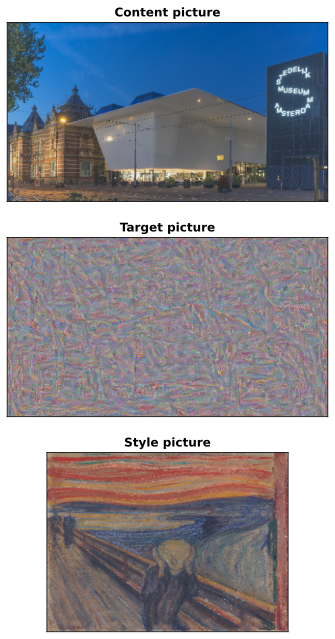

In [42]:
# the "after" pic
fig,ax = plt.subplots(3,1,figsize=(18,11))

pic = content_img.squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[0].imshow(pic)
ax[0].set_title('Content picture',fontweight='bold')
ax[0].set_xticks([])
ax[0].set_yticks([])

pic = torch.sigmoid(target).detach().squeeze().numpy().transpose((1,2,0))
ax[1].imshow(pic)
ax[1].set_title('Target picture',fontweight='bold')
ax[1].set_xticks([])
ax[1].set_yticks([])

pic = style_img.squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[2].imshow(pic,aspect=.6)
ax[2].set_title('Style picture',fontweight='bold')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()